<a href="https://colab.research.google.com/github/vermanaman419-prog/Diabetes-Dataset-EDA-Prediction-with-ML-Models/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Dataset EDA & Prediction with ML Models


**Importing All Required Libraries**

In [21]:
# Basic
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


**Loading dataset**

In [22]:
df = pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Basic Info & Data Understanding**

In [3]:
df.shape
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [39]:
print("MAX AGE: "+str(df['Age'].max()))
print("MIN AGE: "+str(df['Age'].min()))

MAX AGE: 81
MIN AGE: 21


# Basic EDA & Visualizations

 **Distribution** **of** **Target** **Variable**

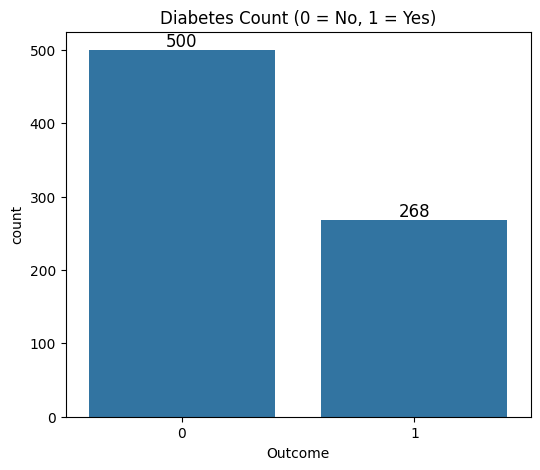

In [24]:
plt.figure(figsize=(6,5))
ax = sns.countplot(data=df, x='Outcome')

# Add title
plt.title("Diabetes Count (0 = No, 1 = Yes)")

# Annotate exact numbers on top of bars
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(
        count,
        (p.get_x() + p.get_width() / 2, count),
        ha='center',
        va='bottom',
        fontsize=12,
        color='black'
    )

plt.show()


**Checking Distributions of Numerical Features**

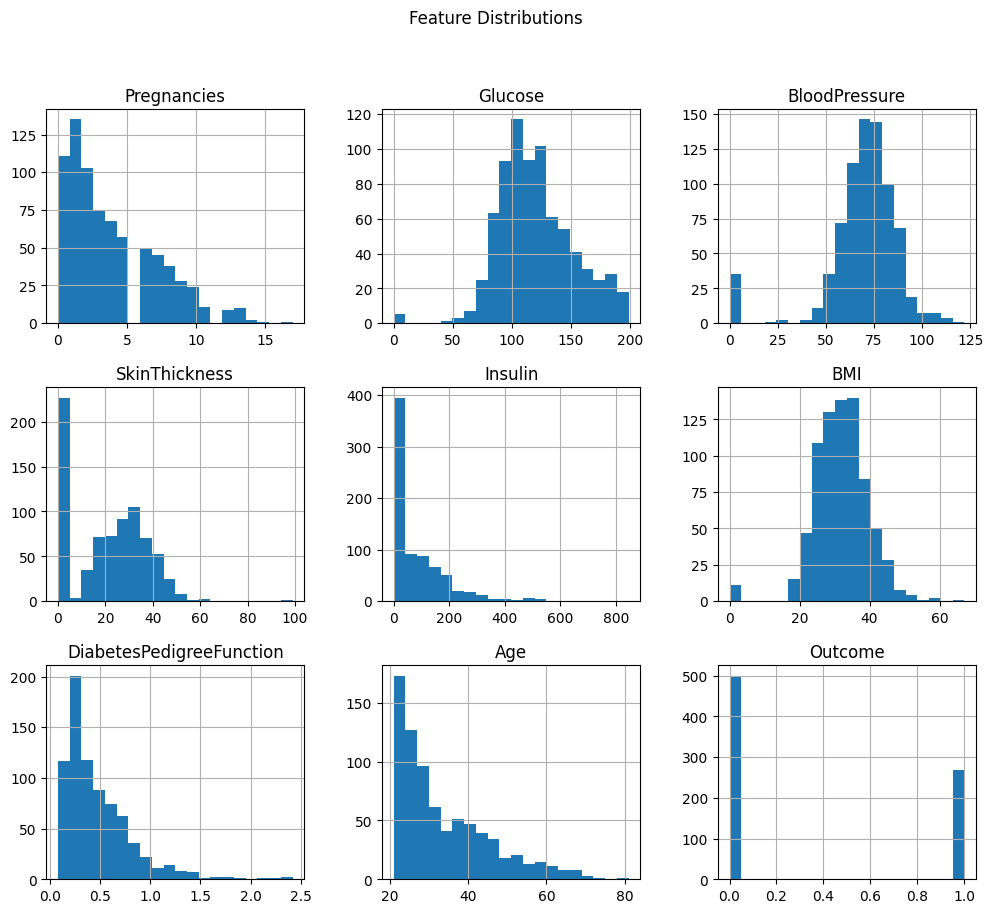

In [23]:
df.hist(figsize=(12,10), bins=20)
plt.suptitle("Feature Distributions")
plt.show()


**Correlation Heatmap**

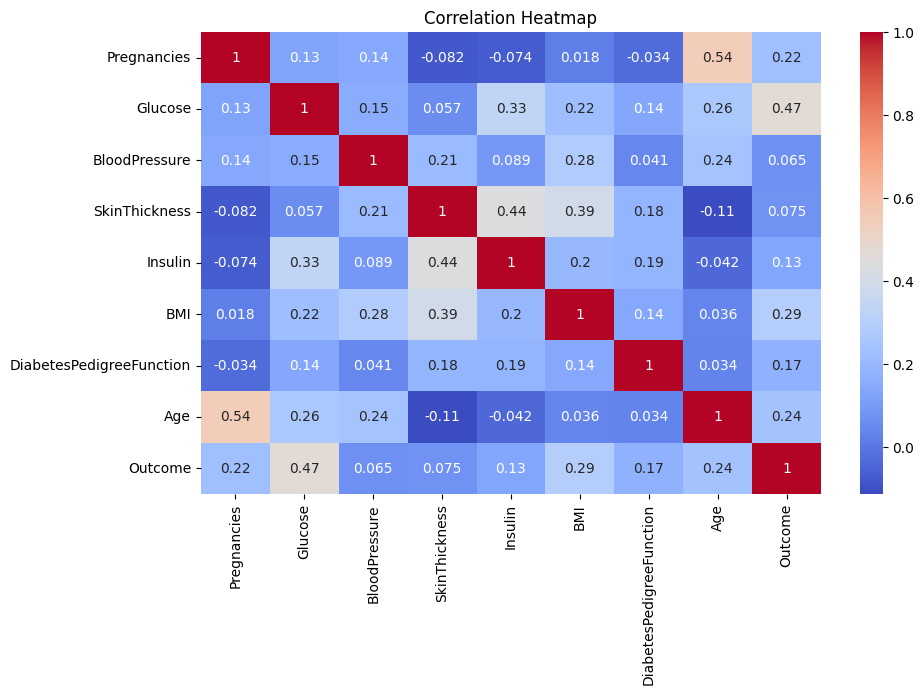

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


**Boxplots to Compare Features by Diabetes Outcome**

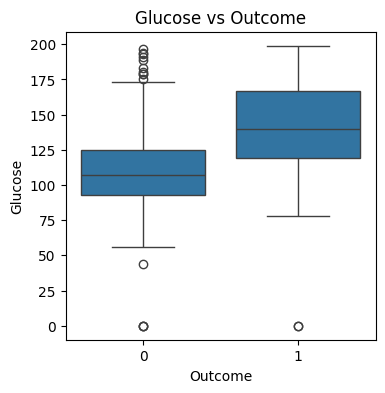

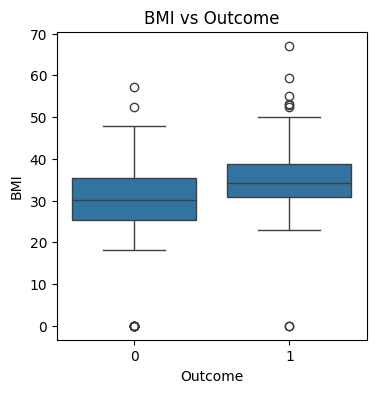

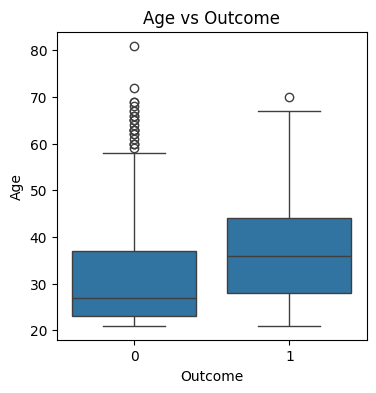

In [27]:
features = ["Glucose", "BMI", "Age"]

for f in features:
    plt.figure(figsize=(4,4))
    sns.boxplot(x="Outcome", y=f, data=df)
    plt.title(f"{f} vs Outcome")
    plt.show()


# **DATA PREPROCESSING & SPLIT**

**Train/Test Split**

In [28]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


**Standard Scaling**

In [29]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# **BUILDING ML MODELS**

**Logistic Regression**

In [30]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))


Logistic Regression Accuracy: 0.7142857142857143
ROC-AUC: 0.8229629629629629


**Random Forest**

In [31]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))


Random Forest Accuracy: 0.7467532467532467
ROC-AUC: 0.8146296296296297


**XGBoost**

In [32]:
xg = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xg.fit(X_train, y_train)

y_pred_xg = xg.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xg))
print("ROC-AUC:", roc_auc_score(y_test, xg.predict_proba(X_test)[:,1]))


XGBoost Accuracy: 0.7337662337662337
ROC-AUC: 0.8051851851851852


# **MODEL EVALUATION VISUALIZATIONS**

**Confusion Matrix**

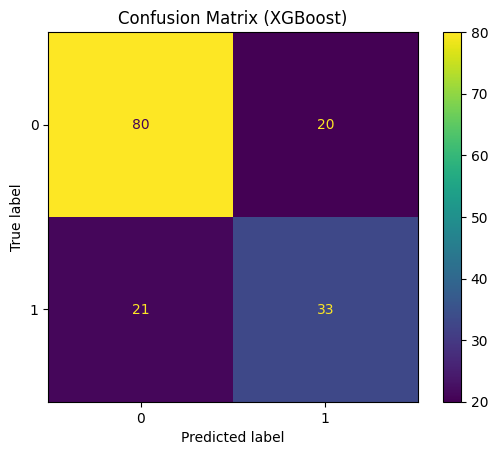

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(xg, X_test, y_test)
plt.title("Confusion Matrix (XGBoost)")
plt.show()


**Classification Report**

In [34]:
print(classification_report(y_test, y_pred_xg))


              precision    recall  f1-score   support

           0       0.79      0.80      0.80       100
           1       0.62      0.61      0.62        54

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



**ROC Curve**

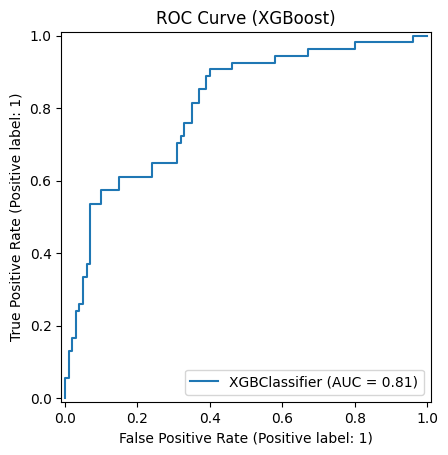

In [35]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(xg, X_test, y_test)
plt.title("ROC Curve (XGBoost)")
plt.show()


# **FINAL CONCLUSIONS VISUALIZATION**

**FEATURE IMPORTANCE (XGBoost)**

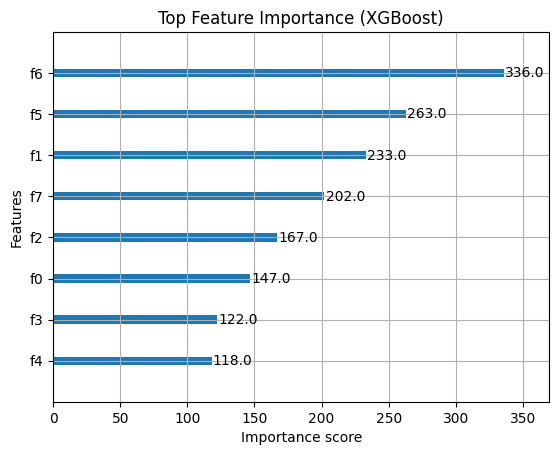

In [36]:
xgb.plot_importance(xg, max_num_features=10)
plt.title("Top Feature Importance (XGBoost)")
plt.show()


**FINAL CONCLUSION (Visualization + Interpretation)**

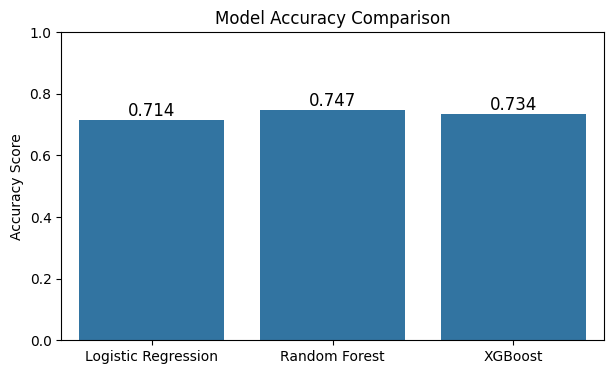

In [37]:
plt.figure(figsize=(7,4))
ax = sns.barplot(x=models, y=scores)

plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.ylim(0, 1)

# Add value labels on bars
for i, p in enumerate(ax.patches):
    value = scores[i]
    ax.annotate(f"{value:.3f}",
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom',
                fontsize=12)

plt.show()


# 📌 FINAL SUMMARY / INSIGHTS
**EDA findings**

*Higher glucose, BMI, age strongly correlate with diabetes.

*Certain features contain zeros that must be treated as missing values.

*Distribution between classes is slightly imbalanced.

**Model findings**

*Logistic Regression: Good baseline but struggles with recall.

*Random Forest: Better classification with higher recall.

*XGBoost performed best overall with the strongest ROC-AUC and balanced metrics.

**Top Predictors**

*Glucose

*BMI

*Age

*Insulin

*DiabetesPedigreeFunction